In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage,fcluster
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://s3grouparmenia.s3.eu-central-1.amazonaws.com/Transcripts_with_sentiment_topic')

In [11]:
# Keep only speeches with the dominant topic of israel-palestine.
df_palestina = df[df['dominant_topic'] == 5]

(493, 13)


<BarContainer object of 49 artists>

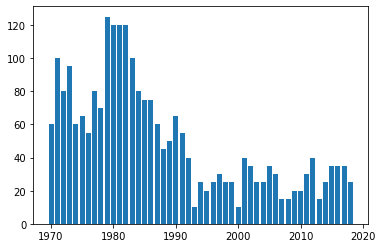

In [12]:
print(df_palestina.shape)
topic_frequency = df_palestina.groupby(['Year_x'])[['dominant_topic']].sum()
plt.bar(topic_frequency.index,topic_frequency.dominant_topic)

<h1> Hierarchical Clustering </h1>

In [19]:
cluster_palestina = df_palestina_time.groupby(['Country_x'])[['polarity','subjectivity','neg','neu','pos']].mean()

In [20]:
cluster_palestina['scaled_polarity'] = whiten(cluster_palestina['polarity'])
cluster_palestina['scaled_subjectivity'] = whiten(cluster_palestina['subjectivity'])
cluster_palestina['scaled_pos'] = whiten(cluster_palestina['pos'])
cluster_palestina['scaled_neg'] = whiten(cluster_palestina['neg'])
cluster_palestina['scaled_neu'] = whiten(cluster_palestina['neu'])

In [21]:
cluster_palestina_scaled = cluster_palestina[['scaled_polarity','scaled_subjectivity','scaled_pos','scaled_neg','scaled_neu']]

In [22]:
distance_matrix_palestina = linkage(cluster_palestina_scaled,method = 'ward', metric = 'euclidean')

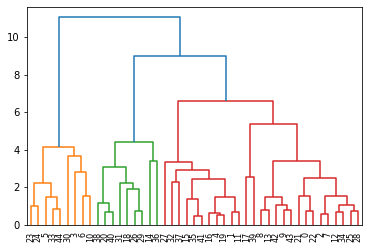

In [23]:
dn = dendrogram(distance_matrix_palestina)
plt.show()

In [24]:
cluster_palestina_scaled['cluster_labels'] = fcluster(distance_matrix_palestina,3,criterion='maxclust')

C:\Users\david\anaconda3\envs\cnn\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


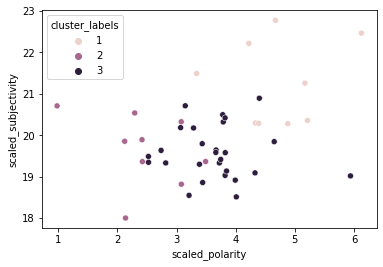

In [25]:
sns.scatterplot(x='scaled_polarity', y='scaled_subjectivity', hue='cluster_labels', data=cluster_palestina_scaled)
plt.show()

<h1> Kmeans Clustering </h1>

In [86]:
from scipy.cluster.vq import kmeans, vq

In [103]:
variables = ['scaled_polarity','scaled_subjectivity','scaled_pos','scaled_neg','scaled_neu']

In [104]:
cluster_centers,_ = kmeans(cluster_palestina_scaled[variables],3)

In [105]:
cluster_palestina_scaled['cluster_labels'], _ = vq(cluster_palestina_scaled[variables],cluster_centers)

C:\Users\david\anaconda3\envs\cnn\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
# Declaring variables for use
distortions = []
num_clusters = range(2, 7)
# Populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(cluster_palestina_scaled[variables], i)
    distortions.append(distortion)

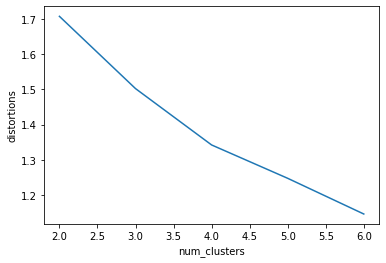

In [91]:
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions',
data = elbow_plot_data)
plt.show()

<AxesSubplot:xlabel='cluster_labels'>

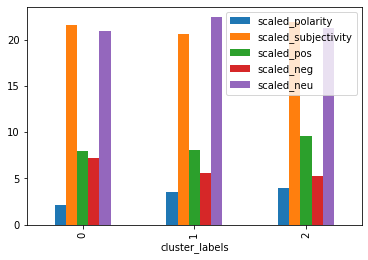

In [106]:
cluster_palestina_scaled.groupby('cluster_labels')[variables].mean().plot(kind='bar')

<AxesSubplot:xlabel='scaled_polarity', ylabel='scaled_neg'>

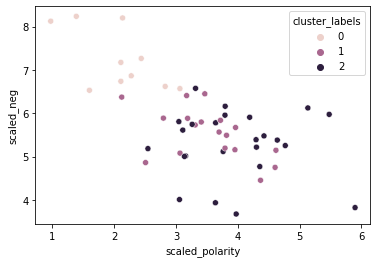

In [107]:
sns.scatterplot(x='scaled_polarity', y='scaled_neg', hue='cluster_labels', data=cluster_palestina_scaled)

In [108]:
cluster_palestina_scaled.to_csv('df.csv')